In [1]:
import pickle
import numpy as np
import os,sys
import matplotlib.pyplot as plt 

In [7]:
path_discoveri = "/Users/francescomassimo/Codes/Optimization_on_cluster/Discoveri"
sys.path.insert(0, path_discoveri)

import Discoveri class

In [8]:
optimization_method                = "Bayesian Optimization" 
# This example shows the use of a Bayesian Optimization
# with a function which has  multiple peaks

## Parameter space to explore

In [9]:
number_of_dimensions               = 2 
search_interval                    = [[0.,10.],[0.,10.]]
input_parameters_names             = ["dim0","dim1"]

In [10]:
number_of_samples_per_iteration    = 1

## Optimization parameters

In [11]:
number_of_iterations               = 50

## Diagnostic and output dump periodicity

In [12]:
iterations_between_outputs         = 10

In [13]:
## Flag used to set if a numpy function or simulation results are optimized:
## if True it optimizes (i.e. maximizes) a numpy function defined in test_function
## Otherwise, it will postprocess simulation results using the function defined in simulation_postprocessing_function
## In both cases it is absolutely necessary that the function to optimize gives a number, different from inf,-inf and from nan
use_test_function                  = True

In [14]:
test_function                      = None
simulation_postprocessing_function = None

In [15]:
def my_test_function(x): # maximum near (4.5,4.5)
    return np.sum(np.sinc(x-5.2))
    
test_function                      = my_test_function

# Optimization of the test function

In [16]:
from discoveriMain import createOptimizationRun

starting_directory = os.getcwd()

# initialize an optimization run 
# the optimizer hyperparameters will be the default ones
optimization_run   = createOptimizationRun(starting_directory              = starting_directory,               \
                                           optimization_method             = optimization_method,              \
                                           number_of_samples_per_iteration = number_of_samples_per_iteration,  \
                                           number_of_dimensions            = number_of_dimensions,             \
                                           search_interval                 = search_interval,                  \
                                           number_of_iterations            = number_of_iterations,             \
                                           use_test_function               = use_test_function,                \
                                           test_function                   = test_function,                    \
                                           iterations_between_outputs      = iterations_between_outputs,       \
                                           input_parameters_names          = input_parameters_names )
    
# execute optimization run
optimization_run.execute()
    
    
# Save the optimization_run object to a file
with open('optimization_run.pkl', 'wb') as file:
    pickle.dump(optimization_run, file)
        
        
# You can load the file later
with open('optimization_run.pkl', 'rb') as file:
    loaded_optimization_run = pickle.load(file)
        

    
       

                                                                                  
           _____    _                                              _              
          |  __ \  (_)                                            (_)             
          | |  | |  _   ___    ___    ___   __   __   ___   _ __   _              
          | |  | | | | / __|  / __|  / _ \  \ \ / /  / _ \ | '__| | |             
          | |__| | | | \__ \ | (__  | (_) |  \ V /  |  __/ | |    | |             
          |_____/  |_| |___/  \___|  \___/    \_/    \___| |_|    |_|             
                                                                                  
           Data-driven Investigation through Simulations on Clusters              
  for the Optimization of the physical Variables' Effects in Regimes of Interest  
                                                                                  
                                                                                  

 In


 ---> Sample 0 Position: [4.49499825 4.68154011]  --> function value at this iteration =  0.9739785740048534

# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5.40052714 5.0994267 ]




 Iteration: 20 / 50

 Total time lapsed from the start of the optimization =  0.5455107688903809  s




 ---> Sample 0 Position: [5.34109378 9.87203273]  --> function value at this iteration =  1.0259942228055294

# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5.40052714 5.0994267 ]




 Iteration: 21 / 50

 Total time lapsed from the start of the optimization =  0.5740900039672852  s




 ---> Sample 0 Position: [3.87043209 9.80083105]  --> function value at this iteration =  -0.1401602633228579

# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5


 ---> Sample 0 Position: [8.28337648 7.81231478]  --> function value at this iteration =  0.08761040192641312

# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5.40052714 5.0994267 ]



# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5.40052714 5.0994267 ]

=== Sample 0

=== optimum position found by sample  0  until now:  [5.40052714 5.0994267 ]

=== optimum function value found by sample  0  until now:  1.9185999020969469




 Iteration: 42 / 50

 Total time lapsed from the start of the optimization =  1.6933948993682861  s




 ---> Sample 0 Position: [9.98840788 9.79696472]  --> function value at this iteration =  0.10706078291842028

# Optimum value    found by the Bayesian Optimization =  1.9185999020969469

# Optimum position found by the Bayesian Optimization =  [5.40052714 5.0994267 ]




 Iteration: 43 / 

# Visualize the surrogate model of bayesian optimization

In [18]:
n_grid_points = 200
x_mesh        = np.linspace(loaded_optimization_run.optimizer.search_interval[0][0],loaded_optimization_run.optimizer.search_interval[0][1],num=n_grid_points)
y_mesh        = np.linspace(loaded_optimization_run.optimizer.search_interval[1][0],loaded_optimization_run.optimizer.search_interval[1][1],num=n_grid_points)

# array for the predicted function values
function_value_mesh      = np.zeros(shape=(n_grid_points,n_grid_points))
# array for the real function values
true_function_value_mesh = np.zeros(shape=(n_grid_points,n_grid_points))
for i in range(0,n_grid_points):
    for j in range(0,n_grid_points):
        # remember that the surrogate model inside the optimizer takes for each dimension idim 
        # the coordinates of the sample normalized by search_interval_size[idim], 
        # i.e. the size of the search interval in that dimension
        x_sample            = x_mesh[i]/loaded_optimization_run.optimizer.search_interval_size[0]
        y_sample            = y_mesh[j]/loaded_optimization_run.optimizer.search_interval_size[1]
        sample_normalized   = (np.array([x_sample,y_sample])).reshape(1,2)
        # predict the value of the function with a surrogate model
        function_value_mesh[i,j]      = loaded_optimization_run.optimizer.model.predict(sample_normalized)
        sample              = np.array([x_mesh[i],y_mesh[j]])
        true_function_value_mesh[i,j] = my_test_function(sample)



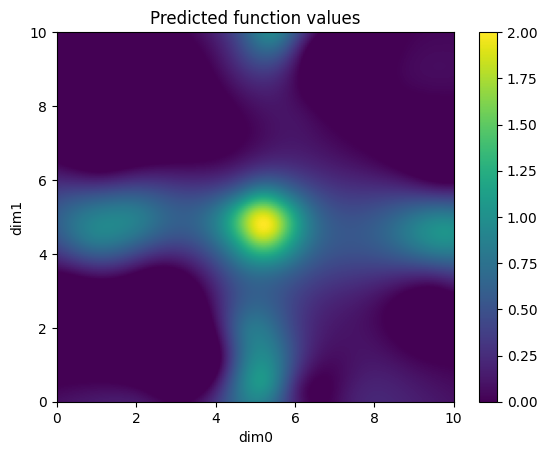

In [19]:
# plot the predicted function values
# especially in more than one dimension, 
# you will need a lot of points to see something in this plot
# that is similar to the real function values, shown in the next plot

plt.figure(1)
plt.imshow(function_value_mesh,extent=[0,10,0,10],aspect="auto",vmin=0,vmax=2)
plt.xlabel("dim0");plt.ylabel("dim1")
plt.title("Predicted function values")
#plt.scatter(loaded_optimization_run.optimizer.X[:,0]*loaded_optimization_run.optimizer.search_interval_size[0],loaded_optimization_run.optimizer.X[:,1]*loaded_optimization_run.optimizer.search_interval_size[1],c=loaded_optimization_run.optimizer.y)
plt.colorbar()

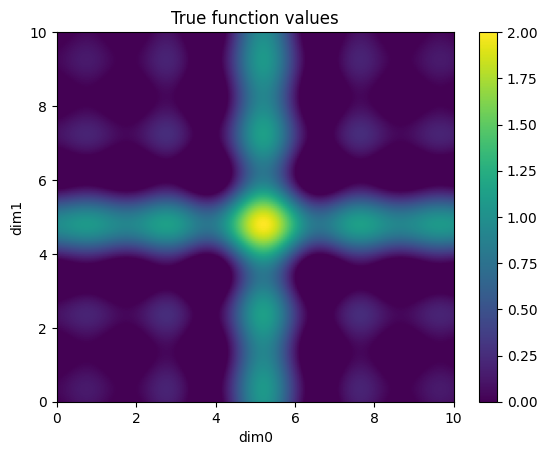

In [20]:
# plot the real function values
plt.figure(2)
plt.imshow(true_function_value_mesh,extent=[0,10,0,10],aspect="auto",vmin=0,vmax=2)
plt.xlabel("dim0");plt.ylabel("dim1")
plt.title("True function values")
#plt.scatter(loaded_optimization_run.optimizer.X[:,0]*loaded_optimization_run.optimizer.search_interval_size[0],loaded_optimization_run.optimizer.X[:,1]*loaded_optimization_run.optimizer.search_interval_size[1],c=loaded_optimization_run.optimizer.y)
plt.colorbar()